## ThinkDSP

Esse notebook contém soluções para os exercícios do Capítulo 1: Sons e Sinais

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [8]:

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/lorenaag/ThinkDSP/raw/master/code/thinkdsp.py

### Exercício 1

Vá para http://freesound.org e baixe uma amostra de som que
inclui música, fala ou outros sons com um tom bem definido.
Selecione um segmento de aproximadamente meio segundo onde o tom é
constante. Calcule e trace o espectro do segmento selecionado.
Que conexão você pode fazer entre o timbre do som e o
estrutura harmônica que você vê no espectro?

Use `high_pass`, `low_pass` e `band_stop` para
filtre alguns dos harmônicos. Em seguida, converta o espectro de volta
a uma onda e ouça-a. Como o som se relaciona com a
mudanças que você fez no espectro?

### Solução questão 1

Som escolhido: https://freesound.org/people/liezen3/sounds/475681/

In [2]:
if not os.path.exists('475681__liezen3__synthethic-violin.wav'):
    !wget https://github.com/lorenaag/ThinkDSP/raw/master/code/475681__liezen3__synthethic-violin.wav

In [3]:
from thinkdsp import read_wave

wave = read_wave('475681__liezen3__synthethic-violin.wav')
wave.normalize()
wave.make_audio()

Plotagem da onda:

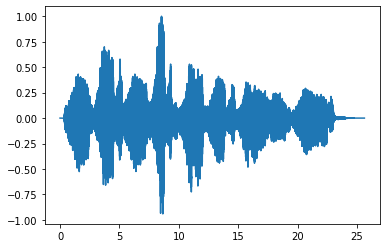

In [4]:
wave.plot()

By trial and error, I selected a segment with a constant pitch (although I believe it is a chord played by at least two horns).

In [12]:
segment = wave.segment(start=13, duration=0.5)
segment.make_audio()

Here's what the segment looks like:


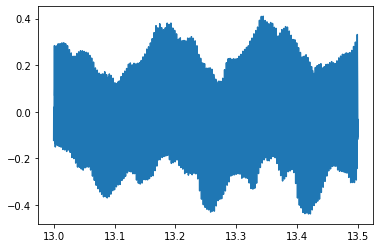

In [13]:
segment.plot()

And here's an even shorter segment so you can see the waveform:

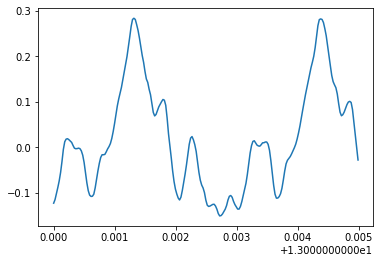

In [14]:
segment.segment(start=13, duration=0.005).plot()

Here's what the spectrum looks like:

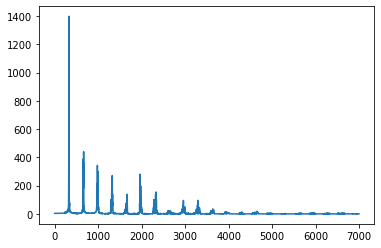

In [15]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

It has lots of frequency components.  Let's zoom in on the fundamental and dominant frequencies:

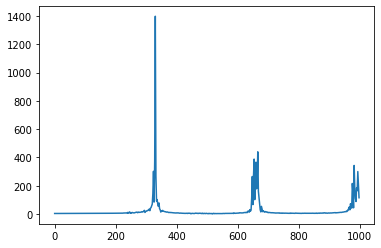

In [16]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

`peaks` prints the highest points in the spectrum and their frequencies, in descending order:

In [17]:
spectrum.peaks()[:30]

[(1398.3150030503505, 330.0),
 (439.65758897299196, 666.0),
 (388.2671842424982, 654.0),
 (376.1117001108404, 328.0),
 (366.4876299501966, 660.0),
 (343.32047298704776, 982.0),
 (301.881200923559, 324.0),
 (300.18263425058166, 994.0),
 (281.07371144117735, 1966.0),
 (271.37216093394943, 1324.0),
 (269.4319982429193, 332.0),
 (268.22933093486006, 652.0),
 (265.218701904883, 648.0),
 (242.83352311211326, 664.0),
 (216.0732703184143, 976.0),
 (211.73189189359437, 996.0),
 (198.42249289907417, 658.0),
 (197.22345049153458, 1978.0),
 (189.04110198547718, 984.0),
 (186.00131779761554, 1312.0),
 (185.1063533351602, 990.0),
 (178.2063135619776, 662.0),
 (164.47470445477282, 992.0),
 (160.99098616861238, 668.0),
 (155.7288966585155, 978.0),
 (155.27379069968612, 2334.0),
 (144.4738255464886, 322.0),
 (141.13866464852498, 1330.0),
 (140.56305253573487, 2332.0),
 (138.95113519065973, 1666.0)]

O pico dominante está em 330 Hz, que também é frequência fundamental.

In [18]:
spectrum.low_pass(2000)

And here's what it sounds like:

In [19]:
spectrum.make_wave().make_audio()

The following interaction allows you to select a segment and apply different filters.  If you set the cutoff to 3400 Hz, you can simulate what the sample would sound like over an old (not digital) phone line.

In [27]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [28]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

### Exercício 2

Synthesize a compound signal by creating SinSignal and CosSignal
objects and adding them up.  Evaluate the signal to get a Wave,
and listen to it.  Compute its Spectrum and plot it.
What happens if you add frequency
components that are not multiples of the fundamental?

### Solução questão 2

Here are some arbitrary components I chose.  It makes an interesting waveform!

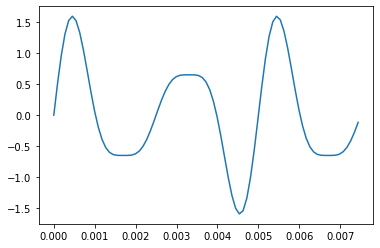

In [15]:
from thinkdsp import SinSignal

signal = (SinSignal(freq=400, amp=1.0) +
          SinSignal(freq=600, amp=0.5) +
          SinSignal(freq=800, amp=0.25))
signal.plot()

We can use the signal to make a wave:

In [16]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

And here's what it sounds like:

In [17]:
wave2.make_audio()

The components are all multiples of 200 Hz, so they make a coherent sounding tone.

Here's what the spectrum looks like:

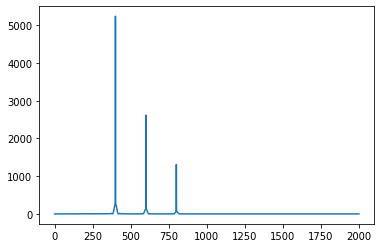

In [18]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=2000)

If we add a component that is not a multiple of 200 Hz, we hear it as a distinct pitch.

In [19]:
signal += SinSignal(freq=450)
signal.make_wave().make_audio()

### Exercício 3

Write a function called `stretch` that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying `ts` and `framerate`.  Hint: it should only take two lines of code.

### Solução questão 3

I'll use the trumpet example again:

In [20]:
wave3 = read_wave('170255__dublie__trumpet.wav')
wave3.normalize()
wave3.make_audio()

Here's my implementation of `stretch`

In [21]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

And here's what it sounds like if we speed it up by a factor of 2.

In [22]:
stretch(wave3, 0.5)
wave3.make_audio()

Here's what it looks like (to confirm that the `ts` got updated correctly).

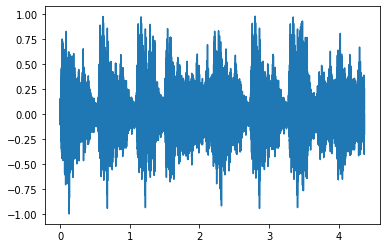

In [23]:
wave3.plot()

I think it sounds better speeded up.  In fact, I wonder if we are playing the original at the right speed.